In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Objective
The objective of this mini project is to predict the quality of wine based on the features such as fixed acidity, volatile acidity, pH, alcohol level, etc, using a supervised machine learning algorithm. 

# About Data
The data includes 4898 types of wines with 11 features and quality. The predictors are the features and the predictant is the quality level of the wine that is between 3 and 9. We will be firstly looking at the correlation of the features with the quality so that we can eliminate some of the features. 

# Model Output
The model output is the wine quality which is a categorical feature so that the output is a classification. Accordingly, we will be applying classification methods including SVM, DT, and RF.

# Read Data

In [145]:
data = pd.read_csv('wine_dataset.csv')
data = data[data['style'] == 'white']
data = data.drop(columns=['style'])

In [146]:
data.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [147]:
# The shape of the data
data.shape

(4898, 12)

In [148]:
#A statistical summary of the data set.
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Clean & Standardized Data

In [149]:
# There is no missing data so there is no need for cleaning
def num_missing(x):
    return sum(x.isnull())
print(data.apply(num_missing, axis=0))

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [150]:
#The range of feature values is so varied, thus we need to stardadize the values.
# from sklearn.preprocessing import scale
# columns=data.columns
# quality = data['quality']
# data = pd.DataFrame(scale(data,axis=0, with_mean=True, with_std=True, copy=True))
# data.columns = columns
#data['quality'] = quality

# Eliminate some of the features that are not correlated with the quality

In [151]:
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


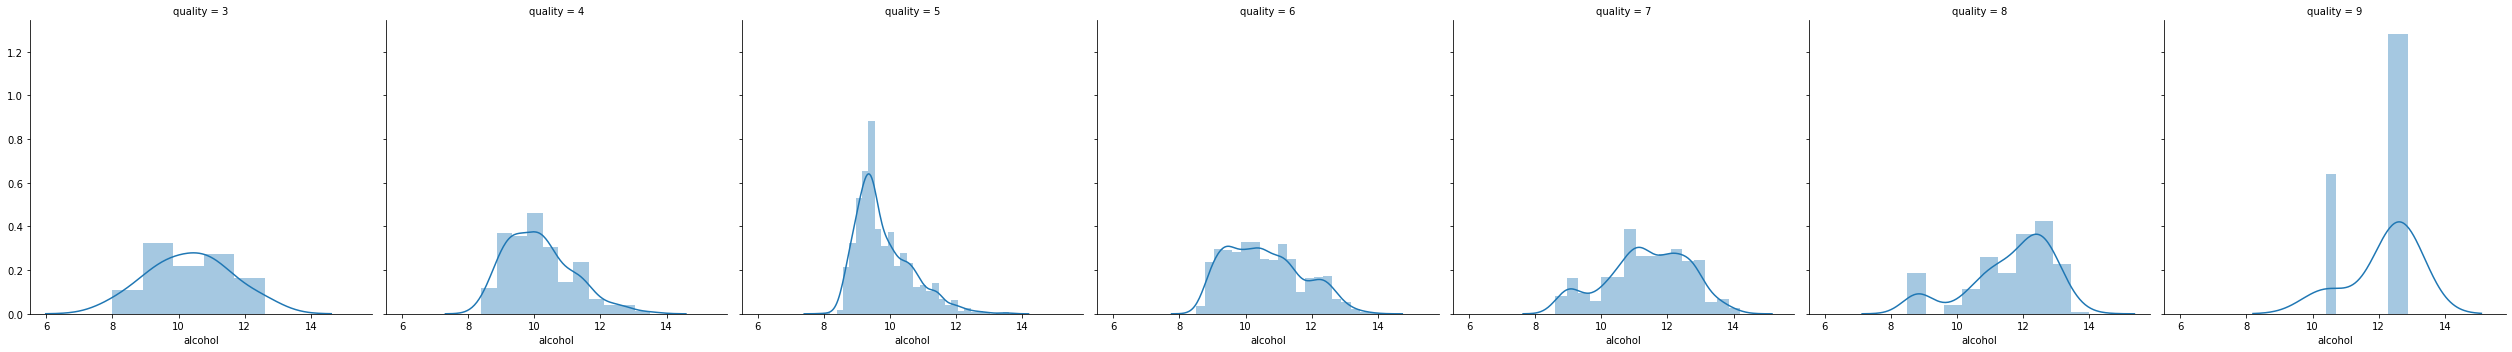

In [152]:
#Create an appropriate histogram for each of the features somehow correlated with quality.

#1: Alcohol
g = sns.FacetGrid(data, col='quality', size=5)
g = g.map(sns.distplot, "alcohol")

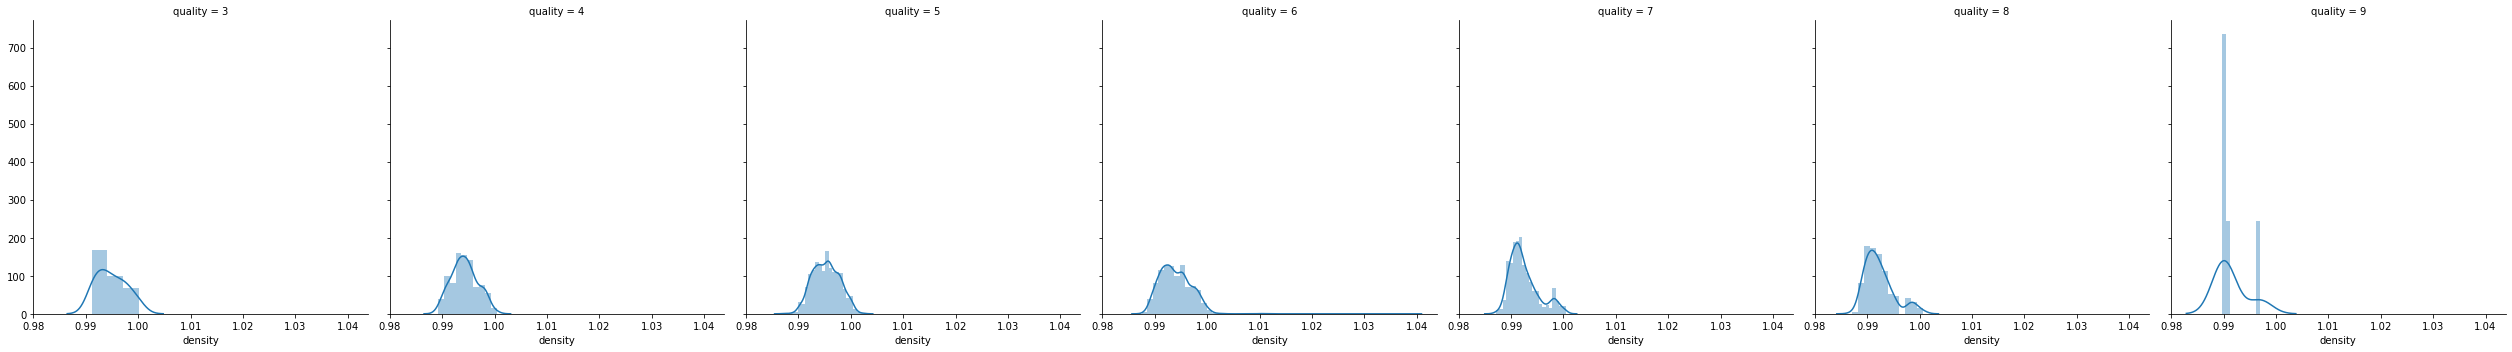

In [153]:
#2: Density
g = sns.FacetGrid(data, col='quality', size=5)
g = g.map(sns.distplot, "density")

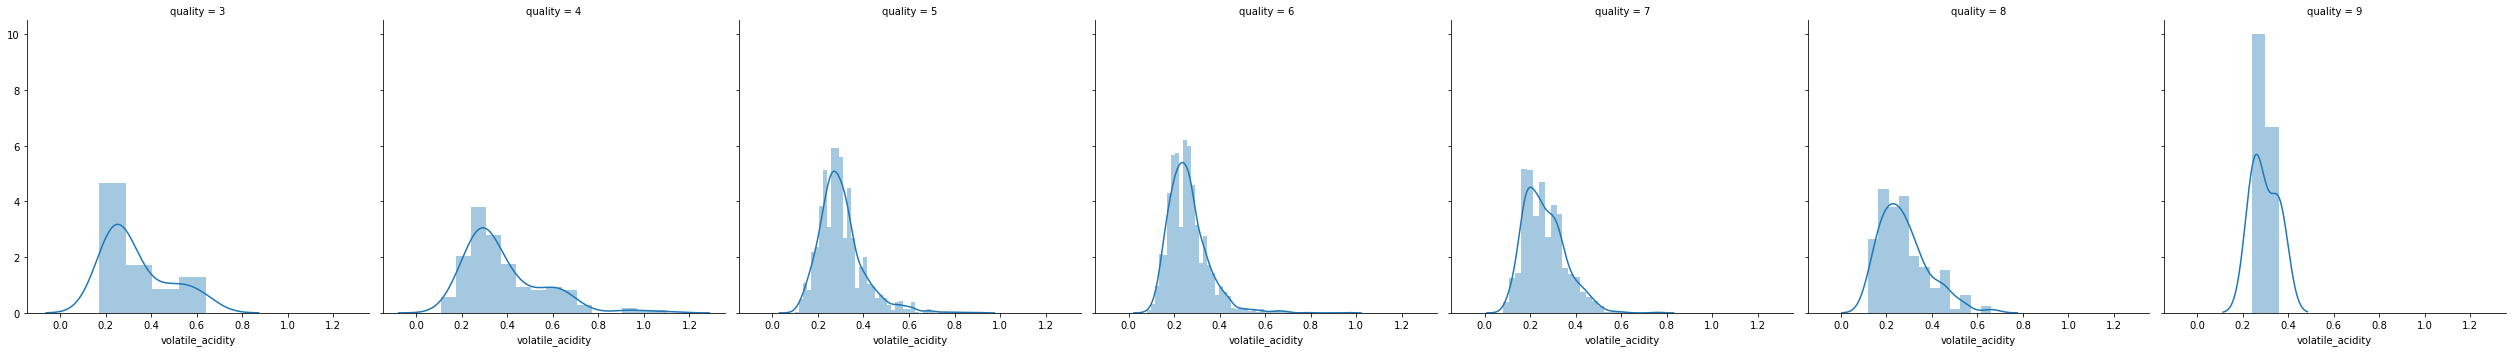

In [154]:
#3: Volatile acidity
g = sns.FacetGrid(data, col='quality', size=5)
g = g.map(sns.distplot, "volatile_acidity")

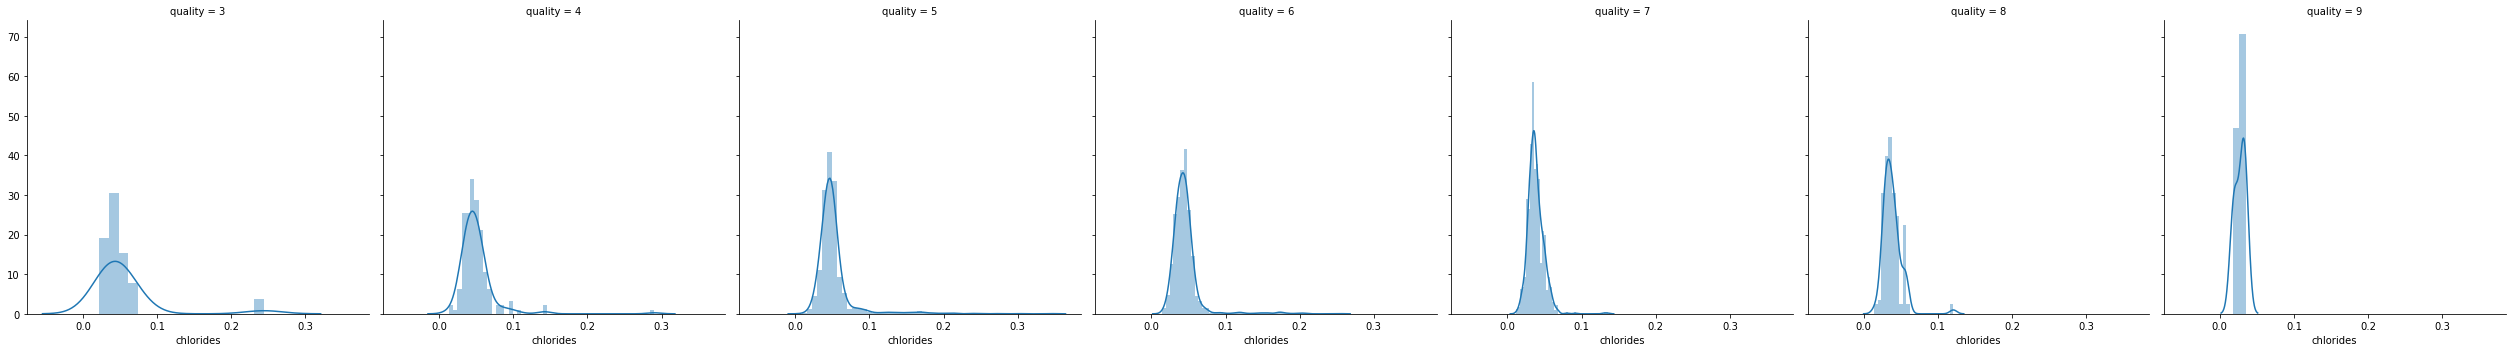

In [155]:
#4: chlorides
g = sns.FacetGrid(data, col='quality', size=5)
g = g.map(sns.distplot, "chlorides")

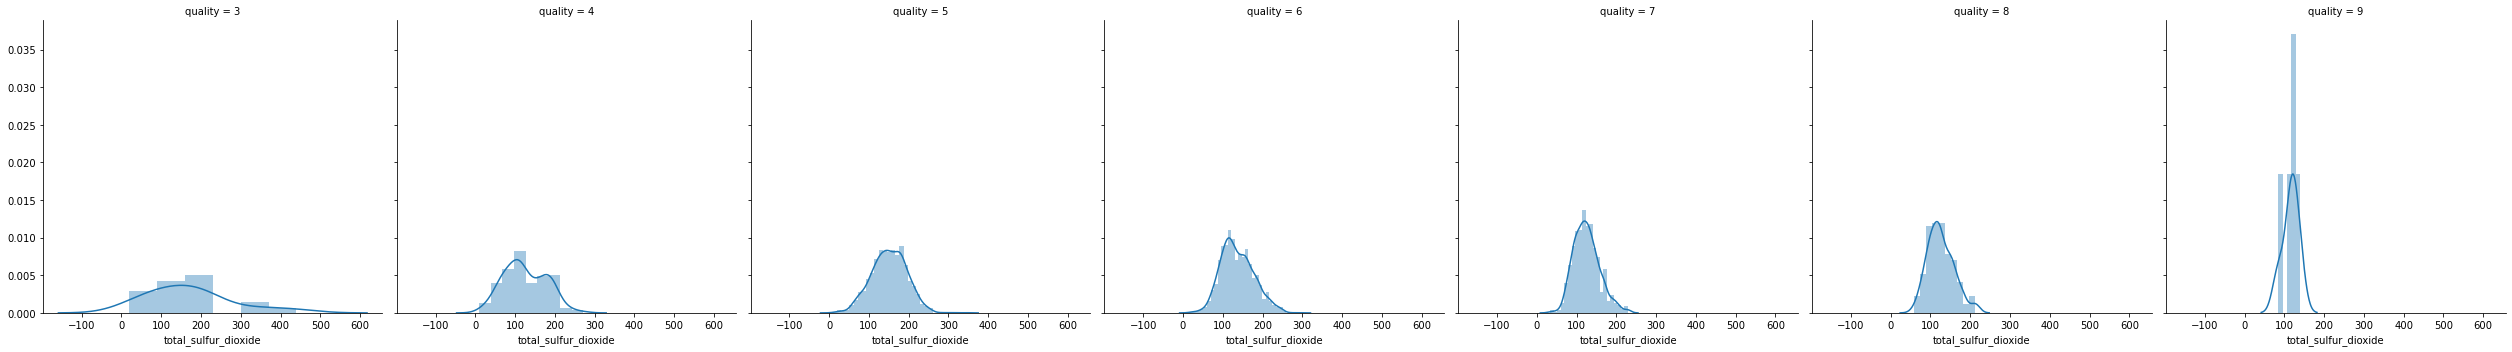

In [156]:
#5: chlorides
g = sns.FacetGrid(data, col='quality', size=5)
g = g.map(sns.distplot, "total_sulfur_dioxide")

# Split Data to Training/Testing

In [157]:
from sklearn.model_selection import train_test_split

selected_columns = ["volatile_acidity", "chlorides", "alcohol", "density", "total_sulfur_dioxide"]

X = data[selected_columns]
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=50)

# Construct Machine Learning model to training set 
I am not sure which algorithm to apply so I will be applying three methods. I will analyze the data using SVM, DT, and RF, to predict what expected QUALITY for bread would be obtained. I will also perform a sensitivity analysis on the effects of training % vs. testing % for the best parameters obtained per each method.


In [158]:
def sens_analysis(X, y, model, jump=-5):
    scores = pd.DataFrame(columns=['Test_Size', 'Score'])
    count = 0
    for i in range(90,0,jump):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)
        model.fit(X_train,y_train)
        score = model.score(X_test,y_test)
        scores.at[count,'Test_Size'] = i
        scores.at[count,'Score'] = model.score(X_test,y_test)
        count += 1
    scores.index = scores.Test_Size
    scores = scores.drop(['Test_Size'], axis=1)
    a = max(scores.Score)
    idx = scores.index[scores['Score'] == a]
    return scores, idx

In [159]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

# fit the model with the training data
model.fit(X_train,y_train)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
accuracy_train = accuracy_score(y_train,predict_train)
accuracy_test = accuracy_score(y_test,predict_test)


# Accuray Score on train dataset
print('\naccuracy_score on train dataset : ', accuracy_train)

# Accuracy Score on test dataset
print('\naccuracy_score on test dataset : ', accuracy_test)

Number of Trees used :  100

accuracy_score on train dataset :  1.0

accuracy_score on test dataset :  0.6006533278889342


In [160]:
sample_leaf_options = [1,2,3,4,5,10,20]
estimators = [10, 100, 250, 500, 1000]

# for loop to iterate for each leaf size
accuracy = {}
for leaf_size in sample_leaf_options :
    for n in estimators:
        model = RandomForestClassifier(n_estimators = n, n_jobs = -1, random_state =50, min_samples_leaf = leaf_size)
        model.fit(X_train,y_train)
        #print("\n Leaf size :", leaf_size, "   n_estimators:", n)
        #print ("Accuracy : ", accuracy_score(y_test,model.predict(X_test)))
        name = "l" + str(leaf_size) + "_n" + str(n) 
        accuracy[name] = accuracy_score(y_test,model.predict(X_test))

key_list = list(accuracy.keys()) 
val_list = list(accuracy.values()) 
print("The best accuracy is: " + str(max(accuracy.values())) + " with the parameters: " + key_list[val_list.index(max(accuracy.values()))])

The best accuracy is: 0.615761535320539 with the parameters: l1_n100


The best size of the test data is 5% with the score of 0.6938775510204082


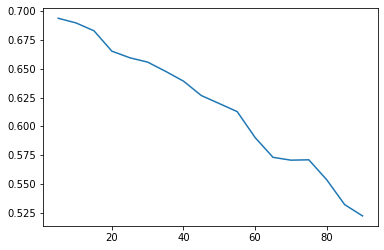

In [161]:
#So the best parameters: 
    #leaf size of 1 and
    #n_estimators of 100
#Sensitivity analysis with these parameters:

model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state =50, min_samples_leaf = 1)

scores, idx = sens_analysis(X,y,model)

plt.plot(scores)

print("The best size of the test data is " + str(idx[0]) + "% with the score of " + str(max(scores.Score)))

In [162]:
#Confusion matrix and the report wtih best parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=50)
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state =50, min_samples_leaf = 1)
model.fit(X_train,y_train)
predict_test = model.predict(X_test)

cm = confusion_matrix(y_test, predict_test) 
print("Confusion matrix:")
print(cm)
print ('Accuracy Score :',accuracy_score(y_test, predict_test))
print("Report:")
print (classification_report(y_test, predict_test))

Confusion matrix:
[[ 2  1  2  0  0]
 [ 1 49 20  1  0]
 [ 0 17 87 13  0]
 [ 0  0 19 22  0]
 [ 0  0  4  0  7]]
Accuracy Score : 0.6816326530612244
Report:
              precision    recall  f1-score   support

           4       0.67      0.40      0.50         5
           5       0.73      0.69      0.71        71
           6       0.66      0.74      0.70       117
           7       0.61      0.54      0.57        41
           8       1.00      0.64      0.78        11

    accuracy                           0.68       245
   macro avg       0.73      0.60      0.65       245
weighted avg       0.69      0.68      0.68       245



In [163]:
#2: SVM:
from sklearn import svm

model = svm.SVC(kernel='rbf', C=1, gamma=1, random_state =50)

model.fit(X_train, y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
accuracy_train = accuracy_score(y_train,predict_train)
accuracy_test = accuracy_score(y_test,predict_test)

# Accuray Score on train dataset
print('\naccuracy_score on train dataset : ', accuracy_train)

# Accuracy Score on test dataset
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on train dataset :  0.6331399097356544

accuracy_score on test dataset :  0.5306122448979592


In [164]:
#This cell takes couple of seconds to run (I had more parameters to check but deleted some of them to make the duration less)
c_value = [1,3]
gamma = [1,10]
degree = [1]
kernel_type = ['rbf']

# for loop to iterate for each leaf size
accuracy = {}
for k in kernel_type:
    for c in c_value :
        for g in gamma:
            for d in degree:
                model = svm.SVC(kernel=k, degree=d, C=c, gamma=g, random_state=50)
                model.fit(X_train, y_train)
                name = "k" + str(k) + "_c" + str(c) + "_g" + str(g) + "_d" + str(d)
                accuracy[name] = accuracy_score(y_test,model.predict(X_test))
key_list = list(accuracy.keys()) 
val_list = list(accuracy.values()) 
print("The best accuracy is: " + str(max(accuracy.values())) + " with the parameters: " + key_list[val_list.index(max(accuracy.values()))])

The best accuracy is: 0.6163265306122448 with the parameters: krbf_c3_g10_d1


The best size of the test data is 5% with the score of 0.5836734693877551


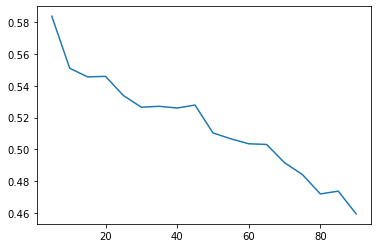

In [165]:
#So the best parameters: 
    #c=3
    #gamma value of 10
    #degree of 1
#Sensitivity analysis with these parameters:

model = svm.SVC(kernel='rbf', degree=1, C=3, gamma=10, random_state=50)

scores, idx = sens_analysis(X,y,model)

plt.plot(scores)

print("The best size of the test data is " + str(idx[0]) + "% with the score of " + str(max(scores.Score)))

In [166]:
#Confusion matrix and the report wtih best parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=50)
model = svm.SVC(kernel='rbf', degree=1, C=3, gamma=10, random_state=50)
model.fit(X_train,y_train)
predict_test = model.predict(X_test)

cm = confusion_matrix(y_test, predict_test) 
print("Confusion matrix:")
print(cm)
print ('Accuracy Score :',accuracy_score(y_test, predict_test))
print("Report:")
print (classification_report(y_test, predict_test))

Confusion matrix:
[[ 1  2  2  0  0]
 [ 0 51 17  3  0]
 [ 1 26 79 10  1]
 [ 1  6 18 15  1]
 [ 0  0  4  2  5]]
Accuracy Score : 0.6163265306122448
Report:
              precision    recall  f1-score   support

           4       0.33      0.20      0.25         5
           5       0.60      0.72      0.65        71
           6       0.66      0.68      0.67       117
           7       0.50      0.37      0.42        41
           8       0.71      0.45      0.56        11

    accuracy                           0.62       245
   macro avg       0.56      0.48      0.51       245
weighted avg       0.61      0.62      0.61       245



In [167]:
#3 DT:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
accuracy_train = accuracy_score(y_train,predict_train)
accuracy_test = accuracy_score(y_test,predict_test)

# Accuray Score on train dataset
print('\naccuracy_score on train dataset : ', accuracy_train)

# Accuracy Score on test dataset
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on train dataset :  1.0

accuracy_score on test dataset :  0.6285714285714286


In [168]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [1, 2, 4, 8, 16, 32, 64, 128, 256]

# for loop to iterate for each leaf size
accuracy = {}
for c in criterion:
    for s in splitter :
        for m in max_depth:
            model = tree.DecisionTreeClassifier(criterion=c, splitter=s, max_depth=m, random_state=50)
            model.fit(X_train, y_train)
            name = "c" + str(c) + "_s" + str(s) + "_m" + str(m) 
            accuracy[name] = accuracy_score(y_test,model.predict(X_test))
key_list = list(accuracy.keys()) 
val_list = list(accuracy.values()) 
print("The best accuracy is: " + str(max(accuracy.values())) + " with the parameters: " + key_list[val_list.index(max(accuracy.values()))])

The best accuracy is: 0.6693877551020408 with the parameters: centropy_srandom_m32


The best size of the test data is 3% with the score of 0.6870748299319728


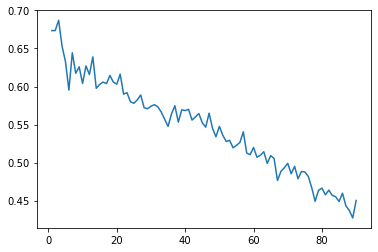

In [169]:
#So the best parameters: 
    #criterion of gini
    #splitter of best
    #max_depth of 32
#Sensitivity analysis with these parameters:

model = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=32, random_state=50)

scores, idx = sens_analysis(X,y,model,-1)

plt.plot(scores)

print("The best size of the test data is " + str(idx[0]) + "% with the score of " + str(max(scores.Score)))

In [170]:
#Confusion matrix and the report wtih best parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=50)
model = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=32, random_state=50)
model.fit(X_train,y_train)
predict_test = model.predict(X_test)

cm = confusion_matrix(y_test, predict_test) 
print("Confusion matrix:")
print(cm)
print ('Accuracy Score :',accuracy_score(y_test, predict_test))
print("Report:")
print (classification_report(y_test, predict_test))

Confusion matrix:
[[ 0  0  0  0  0]
 [ 1 16  2  0  0]
 [ 0  3 17  2  0]
 [ 0  0  1  5  1]
 [ 0  0  0  1  0]]
Accuracy Score : 0.7755102040816326
Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.84      0.84      0.84        19
           6       0.85      0.77      0.81        22
           7       0.62      0.71      0.67         7
           8       0.00      0.00      0.00         1

    accuracy                           0.78        49
   macro avg       0.46      0.47      0.46        49
weighted avg       0.80      0.78      0.79        49



# Compare Tested Algorithms

[0.42244898 0.41020408 0.41836735 0.44489796 0.40408163 0.46326531
 0.45510204 0.43877551 0.44989775 0.45194274]
[0.39183673 0.4122449  0.44081633 0.40204082 0.41428571 0.44897959
 0.35102041 0.36734694 0.44989775 0.38241309]
[0.44489796 0.46734694 0.49591837 0.49183673 0.49591837 0.54489796
 0.4755102  0.54897959 0.56441718 0.4805726 ]


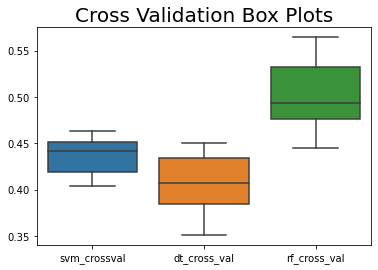

In [171]:
#Q5: Create a boxplot comparing the error from the three ML Algorithms you tested.

from sklearn.model_selection import cross_val_score

svm1 = svm.SVC(kernel='rbf', degree=1, C=3, gamma=10, random_state=50)
dt = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=32, random_state=50)
rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state =50, min_samples_leaf = 1)

svm_cross_val = cross_val_score(svm1, X, y, cv=10)
dt_cross_val = cross_val_score(dt, X, y, cv=10)
rf_cross_val = cross_val_score(rf, X, y, cv=10)

print(svm_cross_val)
print(dt_cross_val)
print(rf_cross_val)

df_cross_val = pd.DataFrame()

df_cross_val['svm_crossval'] = svm_cross_val
df_cross_val['dt_cross_val'] = dt_cross_val
df_cross_val['rf_cross_val'] = rf_cross_val

ax = sns.boxplot(data=df_cross_val)

plt.title('Cross Validation Box Plots', fontdict = {'fontsize': 20})

plt.savefig("cval.png", dpi=200)

There are 4 quality levels (6,7,8,9) means that the probability to randomly predict the quality correct is %25. 
The accuracy score of the methods varies from %62 to %78. The random forest provides the best results but we can conclude that none of the methods is good enough. 